# Exploring probability distributions

In [1]:
# maths
from numpy import exp
from mpmath import polylog

# plotting
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'png'
matplotlib.rcParams['font.size'] = 10
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from mpl_toolkits.mplot3d import axes3d

In [2]:
def makePowerlawWithCutoff(alpha, cutoff):
    '''Create a discrete probability density function for a
    powerlaw-with-cutoff distribution.
    
    :param alpha: the exponent
    :param cutoff: the cutoff
    :returns: the probability density function'''
    
    # the normnalising constant for these distributions
    C = 1.0 / polylog(alpha, exp(-1.0 / cutoff))
    
    def p(k):
        '''Return the probability of finding a node of degree k.
        
        :param k: the degree
        :returns: the probability'''
        return (pow((k + 0.0), -alpha) * exp(-(k + 0.0) / cutoff)) * C
    
    return p

In [3]:
alpha = 2.0
cutoff = 20
pk = makePowerlawWithCutoff(alpha, cutoff)

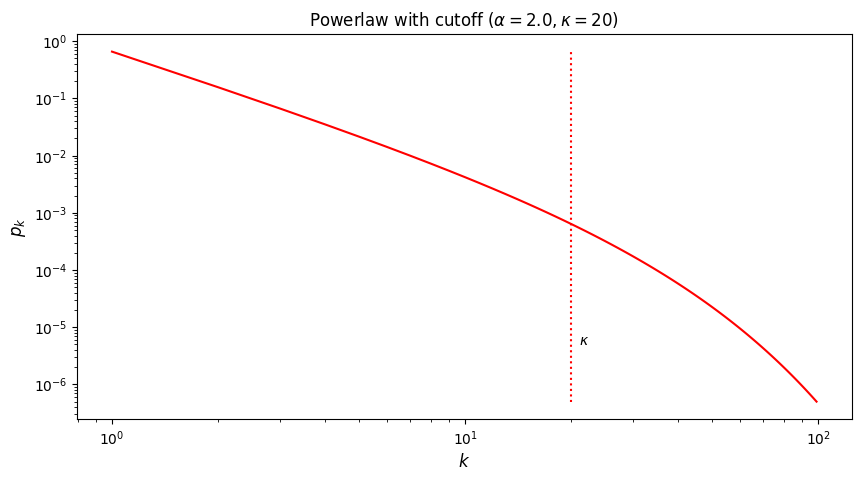

In [4]:
fig = plt.figure(figsize=(10, 5))
ax = plt.gca()

ks = range(1, 100)
pks = [pk(k) for k in ks]

ax.plot(ks, pks, 'r-')

ax.plot([cutoff, cutoff], [min(pks), max(pks)],
        color='red', linestyle='dotted')
ax.annotate('$\\kappa$', [cutoff, min(pks)],
            [cutoff * 1.05, min(pks) * 10])

# set title and axis limits
ax.set_title(f'Powerlaw with cutoff ($\\alpha = {alpha}, \\kappa = {cutoff}$)')
ax.set_xlabel('$k$')
ax.set_ylabel('$p_k$')
ax.loglog()
plt.savefig('plc.png')
plt.show()